# Text Mining

## Load necessary packages

In [1]:
from pathlib import Path
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
from unidecode import unidecode
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import KFold
import string
import collections as ct
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer
from nltk.stem import RSLPStemmer
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import gensim
from sklearn.neural_network import MLPClassifier

## Load corpora

In [2]:
def load_corpus(filename):
    corpus = Path(filename).read_text(encoding="utf8")
    return corpus

In [3]:
def load_corpora(filelist,author):
    files = []
    for file in filelist:
        location = "Corpora/train/"+file
        corpus = load_corpus(location)
        files.append(corpus)
    df = pd.DataFrame(files, columns=['Text'])
    df['Author'] = pd.Series([author for x in range(len(df.index))], index=df.index)
    return df

In [4]:
almada = [
    'AlmadaNegreiros/pg22615.txt',
    'AlmadaNegreiros/pg22730.txt',
    'AlmadaNegreiros/pg22801.txt',
    'AlmadaNegreiros/pg22802.txt',
    'AlmadaNegreiros/pg22969.txt',
    'AlmadaNegreiros/pg23133.txt',
    'AlmadaNegreiros/pg23620.txt',
    'AlmadaNegreiros/pg23879.txt',
    'AlmadaNegreiros/pg23961.txt'
]

In [5]:
corpora_almada = load_corpora(almada, 'Almada Negreiros')
corpora_almada.shape

(9, 2)

In [6]:
camilo = [
    'CamiloCasteloBranco/24691-0.txt',
    'CamiloCasteloBranco/34756-0.txt',
    'CamiloCasteloBranco/pg16425.txt',
    'CamiloCasteloBranco/pg17927.txt',
    'CamiloCasteloBranco/pg19375.txt',
    'CamiloCasteloBranco/pg21406.txt',
    'CamiloCasteloBranco/pg23203.txt',
    'CamiloCasteloBranco/pg23345.txt',
    'CamiloCasteloBranco/pg23346.txt',
    'CamiloCasteloBranco/pg24339.txt',
    'CamiloCasteloBranco/pg25844.txt',
    'CamiloCasteloBranco/pg26017.txt',
    'CamiloCasteloBranco/pg26103.txt',
    'CamiloCasteloBranco/pg26110.txt',
    'CamiloCasteloBranco/pg26988.txt',
    'CamiloCasteloBranco/pg27364.txt',
    'CamiloCasteloBranco/pg27541.txt',
    'CamiloCasteloBranco/pg28310.txt',
    'CamiloCasteloBranco/pg31694.txt',
    'CamiloCasteloBranco/pg33788.txt',
]

corpora_camilo = load_corpora(camilo, 'Camilo Castelo Branco')
corpora_camilo.shape

(20, 2)

In [7]:
eca = [
    'EcaDeQueiros/pg18220.txt',
    'EcaDeQueiros/pg25641.txt',
    'EcaDeQueiros/pg27637.txt',
    'EcaDeQueiros/pg31347.txt',
    'EcaDeQueiros/pg40409.txt'
]

corpora_eca = load_corpora(eca, 'Eca de Queiros')
corpora_eca.shape

(5, 2)

In [8]:
rodrigues_santos = [
    'JoseRodriguesSantos/A Filha Do Capitao - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/A Formula De Deus - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/A Mao do Diabo - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/A Vida Num Sopro - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/Furia Divina - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/O Anjo Branco - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/O Setimo Selo - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/O ultimo Segredo - Jose Rodrigues dos Santos.txt'
]

corpora_rodrigues_santos = load_corpora(rodrigues_santos, 'Jose Rodrigues dos Santos')
corpora_rodrigues_santos.shape

(8, 2)

In [9]:
saramago = [
    'JoseSaramago/A Caverna - Jose Saramago.txt',
    'JoseSaramago/As Intermitencias da Morte - Jose Saramago.txt',
    'JoseSaramago/Caim - Jose Saramago.txt',
    'JoseSaramago/Claraboia - Jose Saramago.txt',
    'JoseSaramago/Ensaio Sobre a Cegueira - Jose Saramago.txt',
    'JoseSaramago/Historia Do Cerco De Lisboa - Jose Saramago.txt',
    'JoseSaramago/Memorial Do Convento - Jose Saramago.txt',
    'JoseSaramago/O Ano Da Morte De Ricardo Reis - Jose Saramago.txt',
    'JoseSaramago/O Conto Da Ilha Desconhecida - Jose Saramago.txt',
    'JoseSaramago/O Homem Duplicado - Jose Saramago.txt',
    'JoseSaramago/Terra Do Pecado - Jose Saramago.txt',
    'JoseSaramago/Viagem Do Elefante - Jose Saramago.txt'
]

corpora_saramago = load_corpora(saramago, 'Jose Saramago')
corpora_saramago.shape

(12, 2)

In [10]:
luisa = [
    'LuisaMarquesSilva/ABelaHistoria.txt',
    'LuisaMarquesSilva/acabouSe.txt',
    'LuisaMarquesSilva/Botão.txt',
    'LuisaMarquesSilva/controlz.txt',
    'LuisaMarquesSilva/emedo.txt',
    'LuisaMarquesSilva/Lisboa2050.txt',
    'LuisaMarquesSilva/passeioInferno.txt',
    'LuisaMarquesSilva/rapsodiasemdo.txt',
    'LuisaMarquesSilva/UltimaHistoria.txt'
]

corpora_luisa = load_corpora(luisa, 'Luisa Marques Silva')
corpora_luisa.shape

(9, 2)

In [11]:
corpora = pd.concat([corpora_almada, corpora_camilo, corpora_eca, corpora_rodrigues_santos, corpora_saramago, corpora_luisa]).reset_index(drop = True)
corpora.shape

(63, 2)

## Cross validation sets

In [12]:
kf = KFold(n_splits=5,shuffle=True) #chose 5 because this means that the train-test split is approximately 80%-20%
train_test_splits = []

for train_index, test_index in kf.split(corpora):
    #print("TRAIN:", train_index, "TEST:", test_index)
    train_test_splits.append((train_index,test_index))
    
train_test_splits

[(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 18,
         19, 20, 21, 22, 24, 25, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 42,
         43, 44, 46, 47, 48, 49, 50, 51, 53, 54, 55, 57, 58, 59, 60, 62]),
  array([15, 17, 23, 26, 27, 28, 34, 35, 41, 45, 52, 56, 61])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 31, 32, 33, 34, 35, 37, 39,
         41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 54, 55, 56, 59, 61]),
  array([14, 24, 25, 30, 36, 38, 40, 47, 53, 57, 58, 60, 62])),
 (array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 19, 20,
         21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 34, 35, 36, 38, 40, 41,
         42, 44, 45, 47, 49, 50, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62]),
  array([ 0,  1, 16, 18, 31, 33, 37, 39, 43, 46, 48, 51, 59])),
 (array([ 0,  1,  5,  6, 11, 12, 13, 14, 15, 16, 17, 18, 20, 22, 23, 24, 25,
         26, 27, 28, 29, 30, 31, 32, 33, 34,

In [13]:
corpora_train_1 = corpora.iloc[train_test_splits[0][0]].reset_index().drop('index',1)
corpora_test_1 = corpora.iloc[train_test_splits[0][1]].reset_index().drop('index',1)

corpora_train_2 = corpora.iloc[train_test_splits[1][0]].reset_index().drop('index',1)
corpora_test_2 = corpora.iloc[train_test_splits[1][1]].reset_index().drop('index',1)

corpora_train_3 = corpora.iloc[train_test_splits[2][0]].reset_index().drop('index',1)
corpora_test_3 = corpora.iloc[train_test_splits[2][1]].reset_index().drop('index',1)

corpora_train_4 = corpora.iloc[train_test_splits[3][0]].reset_index().drop('index',1)
corpora_test_4 = corpora.iloc[train_test_splits[3][1]].reset_index().drop('index',1)

corpora_train_5 = corpora.iloc[train_test_splits[4][0]].reset_index().drop('index',1)
corpora_test_5 = corpora.iloc[train_test_splits[4][1]].reset_index().drop('index',1)

corpora_train_1

,Text,Author
0,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros
1,Title: O Jardim da Pierrette\n\nAuthor: José d...,Almada Negreiros
2,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros
3,\nTitle: Litoral\n A Amadeo de Souza Car...,Almada Negreiros
4,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,Almada Negreiros
5,\n\n*JOSÉ DE ALMADA-NEGREIROS*\n\n\n*K4\n\no q...,Almada Negreiros
6,"\n\n*""ORPHEU""*\n\nREVISTA TRIMESTRAL DE LITERA...",Almada Negreiros
7,\n\n+a ENGOMADEIRA+\n\nNOVELA VULGAR LISBOETA\...,Almada Negreiros
8,\n+MANIFESTO+\n\n+ANTI-DANTAS+\n\nE\n\nPOR EXT...,Almada Negreiros
9,O vinho do Porto\n\nPROCESSO D'UMA BESTIALIDAD...,Camilo Castelo Branco


## Preprocessing

In [14]:
def preprocessing(dataframe,stemmer):
    processed_corpus = []
    
    stop_words_pt = set(stopwords.words("portuguese", "english"))
    
    for i in tqdm(range(len(dataframe))):
        text = dataframe['Text'][i]
        
        #Remove accents
        text = unidecode(text)
        
        #remove punctuation
        text = re.sub('[^a-zA-Z]', ' ', text)
        
        #Convert to lowercase
        text = text.lower()

        #remove tags
        text = BeautifulSoup(text).get_text()
        
        # Convert to list from string
        text = text.split()

        #Stemming
        if stemmer == 'snowball':
            stemmer_pt = SnowballStemmer('portuguese')
        elif stemmer == 'rslp':
            stemmer_pt = RSLPStemmer()
            
        text = [stemmer_pt.stem(word) for word in text if not word in stop_words_pt]
        
        text = " ".join(text)

        processed_corpus.append(text)
    return processed_corpus

In [15]:
cleaned_corpora_1 = preprocessing(corpora_train_1,'snowball')
cleaned_corpora_2 = preprocessing(corpora_train_2,'snowball')
cleaned_corpora_3 = preprocessing(corpora_train_3,'snowball')
cleaned_corpora_4 = preprocessing(corpora_train_4,'snowball')
cleaned_corpora_5 = preprocessing(corpora_train_5,'snowball')

In [16]:
cleaned_test_corpora_1 = preprocessing(corpora_test_1,'snowball')
cleaned_test_corpora_2 = preprocessing(corpora_test_2,'snowball')
cleaned_test_corpora_3 = preprocessing(corpora_test_3,'snowball')
cleaned_test_corpora_4 = preprocessing(corpora_test_4,'snowball')
cleaned_test_corpora_5 = preprocessing(corpora_test_5,'snowball')

In [17]:
corpora_train_1['Clean Text'] = pd.Series(cleaned_corpora_1, index = corpora_train_1.index)
corpora_train_2['Clean Text'] = pd.Series(cleaned_corpora_2, index = corpora_train_2.index)
corpora_train_3['Clean Text'] = pd.Series(cleaned_corpora_3, index = corpora_train_3.index)
corpora_train_4['Clean Text'] = pd.Series(cleaned_corpora_4, index = corpora_train_4.index)
corpora_train_5['Clean Text'] = pd.Series(cleaned_corpora_5, index = corpora_train_5.index)
corpora_train_1['Clean Text'][0]

'title a scena do odio author jose de almada negreiros release date september ebook language portuguese a alvaro de campos excerptos de um poema desbaratado que foi escripto durante os tres dias e as tres noites que durou a revolucao de de maio de satanizo me tara na vara de moyses o castigo das serpentes e me riso nos dentes inferno a arder o meu cantar sou vermelho niagara dos sexos escancarados nos chicotes dos cossacos sou pan demonio trifauce enfermico de gula sou genio de zarathustra em tacas de mare alta sou raiva de medusa e damnacao do sol ladram me a vida por vive la e so me deram uma hao de lati la por sina agora quero vive la hei de poeta canta la em gala sonora e dina hei de gloria desannuvia la hei de guindaste ica la esfinge da valla commum onde me querem rir hei de trovao clarim leva la luz as almas noites do jardim das lagrymas hei de bombo rufa la pompa de pompeia nos funeraes de mim hei de alfange mahoma cantar sodoma na voz de nero hei de ser fuas sem virgem do mila

In [18]:
corpora_test_1['Clean Text'] = pd.Series(cleaned_test_corpora_1, index = corpora_test_1.index)
corpora_test_2['Clean Text'] = pd.Series(cleaned_test_corpora_2, index = corpora_test_2.index)
corpora_test_3['Clean Text'] = pd.Series(cleaned_test_corpora_3, index = corpora_test_3.index)
corpora_test_4['Clean Text'] = pd.Series(cleaned_test_corpora_4, index = corpora_test_4.index)
corpora_test_5['Clean Text'] = pd.Series(cleaned_test_corpora_5, index = corpora_test_5.index)

In [19]:
def word_count(corpora):
    word_count = corpora['Clean Text'].apply(lambda x: len(str(x).split(" ")))
    word_count_2 = corpora['Text'].apply(lambda x: len(str(x).split(" ")))
    corpora['word_count_text'] = word_count_2
    corpora['word_count_clean'] = word_count
    
    return corpora

In [20]:
corpora_train_1 = word_count(corpora_train_1)
corpora_train_2 = word_count(corpora_train_2)
corpora_train_3 = word_count(corpora_train_3)
corpora_train_4 = word_count(corpora_train_4)
corpora_train_5 = word_count(corpora_train_5)

In [21]:
corpora_train_1

,Text,Author,Clean Text,word_count_text,word_count_clean
0,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros,title a scena do odio author jose de almada ne...,1456,1927
1,Title: O Jardim da Pierrette\n\nAuthor: José d...,Almada Negreiros,title o jardim da pierrette author jose de alm...,280,330
2,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,title a invencao do dia claro author jose de a...,6212,6124
3,\nTitle: Litoral\n A Amadeo de Souza Car...,Almada Negreiros,title litoral a amadeo de souza cardozo author...,1225,679
4,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,Almada Negreiros,exposicao amadeo de souza cardoso liga naval d...,521,594
5,\n\n*JOSÉ DE ALMADA-NEGREIROS*\n\n\n*K4\n\no q...,Almada Negreiros,jose de almada negreiros k o quadrado azul aca...,5876,6681
6,"\n\n*""ORPHEU""*\n\nREVISTA TRIMESTRAL DE LITERA...",Almada Negreiros,orpheu revista trimestral de literatura portug...,14191,16271
7,\n\n+a ENGOMADEIRA+\n\nNOVELA VULGAR LISBOETA\...,Almada Negreiros,a engomadeira novela vulgar lisboeta engomadei...,11408,12914
8,\n+MANIFESTO+\n\n+ANTI-DANTAS+\n\nE\n\nPOR EXT...,Almada Negreiros,manifesto anti dantas e por extenso por jose d...,2441,2814
9,O vinho do Porto\n\nPROCESSO D'UMA BESTIALIDAD...,Camilo Castelo Branco,o vinho do porto processo d uma bestialidade i...,10154,10195


In [22]:
corpora_train_1.groupby(['Author']).sum()

,word_count_text,word_count_clean
Author,,
Almada Negreiros,43610,48334
Camilo Castelo Branco,508650,541902
Eca de Queiros,438367,462618
Jose Rodrigues dos Santos,675421,704238
Jose Saramago,852184,870993
Luisa Marques Silva,30295,31149


##  Data exploration

In [23]:
corpora_train_1.word_count_clean.describe()

count        50.000000
mean      53184.680000
std       54448.926503
min         330.000000
25%        5969.500000
50%       46930.500000
75%       76232.500000
max      221120.000000
Name: word_count_clean, dtype: float64

In [24]:
all_words_1 = ' '.join(corpora_train_1['Clean Text']).split()
all_words_2 = ' '.join(corpora_train_2['Clean Text']).split()
all_words_3 = ' '.join(corpora_train_3['Clean Text']).split()
all_words_4 = ' '.join(corpora_train_4['Clean Text']).split()
all_words_5 = ' '.join(corpora_train_5['Clean Text']).split()

In [25]:
# Count all words
freq_1 = pd.Series(all_words_1).value_counts()
freq_2 = pd.Series(all_words_2).value_counts()
freq_3 = pd.Series(all_words_3).value_counts()
freq_4 = pd.Series(all_words_4).value_counts()
freq_5 = pd.Series(all_words_5).value_counts()

In [26]:
freq_1[:25]

a       118926
e        98306
o        94291
de       93058
que      92210
se       49677
nao      39765
do       32117
um       29998
da       29090
os       28264
com      25924
para     25353
as       23057
uma      22638
em       21839
por      16974
no       16027
como     15067
lhe      14369
na       14010
ao       13753
mas      12767
mais     12245
me       10539
dtype: int64

In [27]:
def get_top_n_grams(corpus, top_k, n):
    """
    Function that receives a list of documents (corpus) and extracts
        the top k most frequent n-grams for that corpus.
        
    :param corpus: list of texts
    :param top_k: int with the number of n-grams that we want to extract
    :param n: n gram type to be considered 
             (if n=1 extracts unigrams, if n=2 extracts bigrams, ...)
             
    :return: Returns a sorted dataframe in which the first column 
        contains the extracted ngrams and the second column contains
        the respective counts
    """
    vec = CountVectorizer(ngram_range=(n, n), max_features=2000).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = []
    for word, idx in vec.vocabulary_.items():
        words_freq.append((word, sum_words[0, idx]))
        
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_df = pd.DataFrame(words_freq[:top_k])
    top_df.columns = ["Ngram", "Freq"]
    return top_df

In [28]:
top_df_1 = get_top_n_grams(corpora_train_1["Clean Text"], top_k=20, n=1)
top_df_2 = get_top_n_grams(corpora_train_2["Clean Text"], top_k=20, n=1)
top_df_3 = get_top_n_grams(corpora_train_3["Clean Text"], top_k=20, n=1)
top_df_4 = get_top_n_grams(corpora_train_4["Clean Text"], top_k=20, n=1)
top_df_5 = get_top_n_grams(corpora_train_5["Clean Text"], top_k=20, n=1)

In [29]:
top_df_1.head(10)

,Ngram,Freq
0,de,93058
1,que,92210
2,se,49677
3,nao,39765
4,do,32117
5,um,29998
6,da,29090
7,os,28264
8,com,25924
9,para,25353


In [30]:
def plot_frequencies(top_df):
    """
    Function that receives a dataframe from the "get_top_n_grams" function
    and plots the frequencies in a bar plot.
    """
    x_labels = top_df["Ngram"][:30]
    y_pos = np.arange(len(x_labels))
    values = top_df["Freq"][:30]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, x_labels)
    plt.ylabel('Frequencies')
    plt.title('Words')
    plt.xticks(rotation=90)
    plt.show()

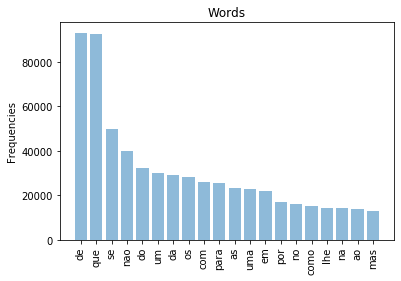

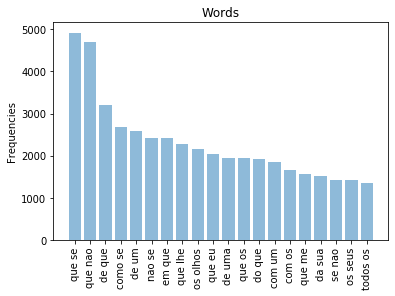

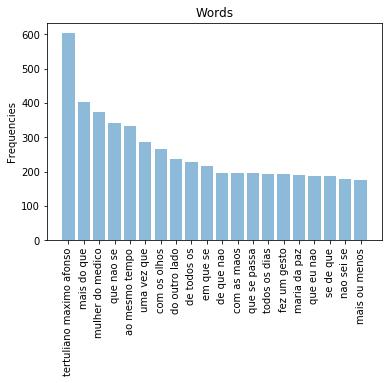

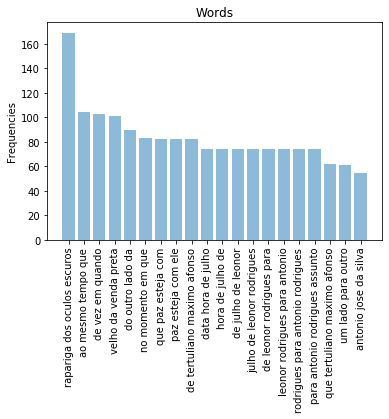

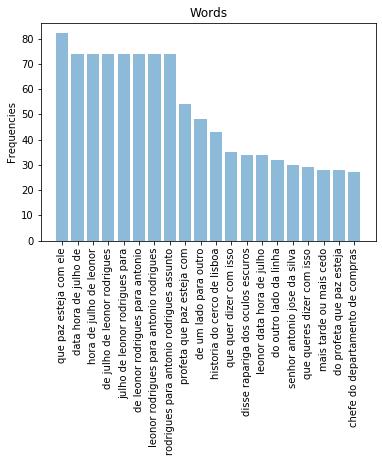

In [31]:
for i in range(1,6):
    top = get_top_n_grams(corpora_train_1["Clean Text"], top_k=20, n=i)
    plot_frequencies(top)

## Convert text into vectors

In [32]:
stopwords = set(stopwords.words("portuguese"))
stop_words = []
for word in stopwords:
    word = unidecode(word)
    stop_words.append(word)

In [33]:
cv = CountVectorizer(
    max_df=0.8,
    stop_words=stop_words, 
    max_features=10000, 
    ngram_range=(1,3) # all inclusive from {1,2,3}, if only bigrams use (2,2)
)

In [34]:
X_train_cv_1 = cv.fit_transform(corpora_train_1['Clean Text'])
X_train_cv_2 = cv.fit_transform(corpora_train_2['Clean Text'])
X_train_cv_3 = cv.fit_transform(corpora_train_3['Clean Text'])
X_train_cv_4 = cv.fit_transform(corpora_train_4['Clean Text'])
X_train_cv_5 = cv.fit_transform(corpora_train_5['Clean Text'])

In [35]:
X_test_cv_1 = cv.fit_transform(corpora_test_1['Clean Text'])
X_test_cv_2 = cv.fit_transform(corpora_test_2['Clean Text'])
X_test_cv_3 = cv.fit_transform(corpora_test_3['Clean Text'])
X_test_cv_4 = cv.fit_transform(corpora_test_4['Clean Text'])
X_test_cv_5 = cv.fit_transform(corpora_test_5['Clean Text'])

In [36]:
tf_idf = TfidfVectorizer(
    max_df=0.8,
    stop_words=stop_words, 
    max_features=10000, 
    ngram_range=(1,3)
)

In [37]:
X_train_tf_idf_1 = tf_idf.fit_transform(corpora_train_1['Clean Text'])
X_train_tf_idf_2 = tf_idf.fit_transform(corpora_train_2['Clean Text'])
X_train_tf_idf_3 = tf_idf.fit_transform(corpora_train_3['Clean Text'])
X_train_tf_idf_4 = tf_idf.fit_transform(corpora_train_4['Clean Text'])
X_train_tf_idf_5 = tf_idf.fit_transform(corpora_train_5['Clean Text'])

In [38]:
X_test_tf_idf_1 = tf_idf.fit_transform(corpora_test_1['Clean Text'])
X_test_tf_idf_2 = tf_idf.fit_transform(corpora_test_2['Clean Text'])
X_test_tf_idf_3 = tf_idf.fit_transform(corpora_test_3['Clean Text'])
X_test_tf_idf_4 = tf_idf.fit_transform(corpora_test_4['Clean Text'])
X_test_tf_idf_5 = tf_idf.fit_transform(corpora_test_5['Clean Text'])

In [39]:
corpora_train_1['Word List'] = corpora_train_1['Clean Text']
corpora_train_2['Word List'] = corpora_train_2['Clean Text']
corpora_train_3['Word List'] = corpora_train_3['Clean Text']
corpora_train_4['Word List'] = corpora_train_4['Clean Text']
corpora_train_5['Word List'] = corpora_train_5['Clean Text']

In [40]:
corpora_test_1['Word List'] = corpora_test_1['Clean Text']
corpora_test_2['Word List'] = corpora_test_2['Clean Text']
corpora_test_3['Word List'] = corpora_test_3['Clean Text']
corpora_test_4['Word List'] = corpora_test_4['Clean Text']
corpora_test_5['Word List'] = corpora_test_5['Clean Text']

In [41]:
for i in corpora_train_1.index:
    mystr = corpora_train_1['Clean Text'][i]
    wordList = re.sub("[^\w]", " ",  mystr).split()
    
    corpora_train_1['Word List'][i] = wordList
    
for i in corpora_train_2.index:
    mystr = corpora_train_2['Clean Text'][i]
    wordList = re.sub("[^\w]", " ",  mystr).split()
    
    corpora_train_2['Word List'][i] = wordList
    
for i in corpora_train_3.index:
    mystr = corpora_train_3['Clean Text'][i]
    wordList = re.sub("[^\w]", " ",  mystr).split()
    
    corpora_train_3['Word List'][i] = wordList
    
for i in corpora_train_4.index:
    mystr = corpora_train_4['Clean Text'][i]
    wordList = re.sub("[^\w]", " ",  mystr).split()
    
    corpora_train_4['Word List'][i] = wordList
    
for i in corpora_train_5.index:
    mystr = corpora_train_5['Clean Text'][i]
    wordList = re.sub("[^\w]", " ",  mystr).split()
    
    corpora_train_5['Word List'][i] = wordList

C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWith

In [42]:
for i in corpora_test_1.index:
    mystr = corpora_test_1['Clean Text'][i]
    wordList = re.sub("[^\w]", " ",  mystr).split()
    
    corpora_test_1['Word List'][i] = wordList
    
for i in corpora_test_2.index:
    mystr = corpora_test_2['Clean Text'][i]
    wordList = re.sub("[^\w]", " ",  mystr).split()
    
    corpora_test_2['Word List'][i] = wordList
    
for i in corpora_test_3.index:
    mystr = corpora_test_3['Clean Text'][i]
    wordList = re.sub("[^\w]", " ",  mystr).split()
    
    corpora_test_3['Word List'][i] = wordList
    
for i in corpora_test_4.index:
    mystr = corpora_test_4['Clean Text'][i]
    wordList = re.sub("[^\w]", " ",  mystr).split()
    
    corpora_test_4['Word List'][i] = wordList
    
for i in corpora_test_5.index:
    mystr = corpora_test_5['Clean Text'][i]
    wordList = re.sub("[^\w]", " ",  mystr).split()
    
    corpora_test_5['Word List'][i] = wordList

In [43]:
X_train_w2v_1 = corpora_train_1['Word List']
X_train_w2v_2 = corpora_train_2['Word List']
X_train_w2v_3 = corpora_train_3['Word List']
X_train_w2v_4 = corpora_train_4['Word List']
X_train_w2v_5 = corpora_train_5['Word List']

In [44]:
w2v_train_1 = gensim.models.Word2Vec(X_train_w2v_1,min_count=0,workers=4)
w2v_train_2 = gensim.models.Word2Vec(X_train_w2v_2,min_count=0,workers=4)
w2v_train_3 = gensim.models.Word2Vec(X_train_w2v_3,min_count=0,workers=4)
w2v_train_4 = gensim.models.Word2Vec(X_train_w2v_4,min_count=0,workers=4)
w2v_train_5 = gensim.models.Word2Vec(X_train_w2v_5,min_count=0,workers=4)

In [45]:
X_test_w2v_1 = corpora_test_1['Word List']
X_test_w2v_2 = corpora_test_2['Word List']
X_test_w2v_3 = corpora_test_3['Word List']
X_test_w2v_4 = corpora_test_4['Word List']
X_test_w2v_5 = corpora_test_5['Word List']

In [46]:
w2v_test_1 = gensim.models.Word2Vec(X_test_w2v_1,min_count=0,workers=4)
w2v_test_2 = gensim.models.Word2Vec(X_test_w2v_2,min_count=0,workers=4)
w2v_test_3 = gensim.models.Word2Vec(X_test_w2v_3,min_count=0,workers=4)
w2v_test_4 = gensim.models.Word2Vec(X_test_w2v_4,min_count=0,workers=4)
w2v_test_5 = gensim.models.Word2Vec(X_test_w2v_5,min_count=0,workers=4)

In [47]:
Encoder = LabelEncoder()

le_1 = Encoder.fit(corpora_train_1['Author'])
le_2 = Encoder.fit(corpora_train_2['Author'])
le_3 = Encoder.fit(corpora_train_3['Author'])
le_4 = Encoder.fit(corpora_train_4['Author'])
le_5 = Encoder.fit(corpora_train_5['Author'])

le_1.classes_

array(['Almada Negreiros', 'Camilo Castelo Branco', 'Eca de Queiros',
       'Jose Rodrigues dos Santos', 'Jose Saramago',
       'Luisa Marques Silva'], dtype=object)

In [48]:
Y_train_1 = pd.Series(le_1.transform(corpora_train_1['Author']),index=corpora_train_1.index)
Y_train_2 = pd.Series(le_2.transform(corpora_train_2['Author']),index=corpora_train_2.index)
Y_train_3 = pd.Series(le_3.transform(corpora_train_3['Author']),index=corpora_train_3.index)
Y_train_4 = pd.Series(le_4.transform(corpora_train_4['Author']),index=corpora_train_4.index)
Y_train_5 = pd.Series(le_4.transform(corpora_train_5['Author']),index=corpora_train_5.index)

In [49]:
Y_test_1 = pd.Series(le_1.transform(corpora_test_1['Author']),index=corpora_test_1.index)
Y_test_2 = pd.Series(le_2.transform(corpora_test_2['Author']),index=corpora_test_2.index)
Y_test_3 = pd.Series(le_3.transform(corpora_test_3['Author']),index=corpora_test_3.index)
Y_test_4 = pd.Series(le_4.transform(corpora_test_4['Author']),index=corpora_test_4.index)
Y_test_5 = pd.Series(le_5.transform(corpora_test_5['Author']),index=corpora_test_5.index)

## Classification Models

### Naive Bayes

In [50]:
NB = MultinomialNB()

parameters = {
    'alpha':[0.0,1.0],
    'fit_prior':[True,False]
}

clf = GridSearchCV(NB, parameters)

In [51]:
clf_NB_cv_1 = clf.fit(X_train_cv_1,Y_train_1)
clf_NB_cv_2 = clf.fit(X_train_cv_2,Y_train_2)
clf_NB_cv_3 = clf.fit(X_train_cv_3,Y_train_3)
clf_NB_cv_4 = clf.fit(X_train_cv_4,Y_train_4)
clf_NB_cv_5 = clf.fit(X_train_cv_5,Y_train_5)

C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10


C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [52]:
NB_cv_1 = clf_NB_cv_1.best_estimator_
NB_cv_2 = clf_NB_cv_2.best_estimator_
NB_cv_3 = clf_NB_cv_3.best_estimator_
NB_cv_4 = clf_NB_cv_4.best_estimator_
NB_cv_5 = clf_NB_cv_5.best_estimator_

In [53]:
NB_cv_1.fit(X_train_cv_1,Y_train_1)
NB_cv_2.fit(X_train_cv_2,Y_train_2)
NB_cv_3.fit(X_train_cv_3,Y_train_3)
NB_cv_4.fit(X_train_cv_4,Y_train_4)
NB_cv_5.fit(X_train_cv_5,Y_train_5)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [54]:
predictions_NB_cv_1 = NB_cv_1.predict(X_test_cv_1)
predictions_NB_cv_2 = NB_cv_2.predict(X_test_cv_2)
predictions_NB_cv_3 = NB_cv_3.predict(X_test_cv_3)
predictions_NB_cv_4 = NB_cv_4.predict(X_test_cv_4)
predictions_NB_cv_5 = NB_cv_5.predict(X_test_cv_5)

In [55]:
accuracy_NB_cv_1 = accuracy_score(predictions_NB_cv_1, Y_test_1)*100
accuracy_NB_cv_2 = accuracy_score(predictions_NB_cv_2, Y_test_2)*100
accuracy_NB_cv_3 = accuracy_score(predictions_NB_cv_3, Y_test_3)*100
accuracy_NB_cv_4 = accuracy_score(predictions_NB_cv_4, Y_test_4)*100
accuracy_NB_cv_5 = accuracy_score(predictions_NB_cv_5, Y_test_5)*100

accuracy_NB_cv = (accuracy_NB_cv_1 + accuracy_NB_cv_2 + accuracy_NB_cv_3 + accuracy_NB_cv_4 + accuracy_NB_cv_5)/5
accuracy_NB_cv

16.28205128205128

In [56]:
clf_NB_tf_idf_1 = clf.fit(X_train_tf_idf_1,Y_train_1)
clf_NB_tf_idf_2 = clf.fit(X_train_tf_idf_2,Y_train_2)
clf_NB_tf_idf_3 = clf.fit(X_train_tf_idf_3,Y_train_3)
clf_NB_tf_idf_4 = clf.fit(X_train_tf_idf_4,Y_train_4)
clf_NB_tf_idf_5 = clf.fit(X_train_tf_idf_5,Y_train_5)

C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10


C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [57]:
NB_tf_idf_1 = clf_NB_tf_idf_1.best_estimator_
NB_tf_idf_2 = clf_NB_tf_idf_2.best_estimator_
NB_tf_idf_3 = clf_NB_tf_idf_3.best_estimator_
NB_tf_idf_4 = clf_NB_tf_idf_4.best_estimator_
NB_tf_idf_5 = clf_NB_tf_idf_5.best_estimator_

In [58]:
NB_tf_idf_1.fit(X_train_tf_idf_1,Y_train_1)
NB_tf_idf_2.fit(X_train_tf_idf_2,Y_train_2)
NB_tf_idf_3.fit(X_train_tf_idf_3,Y_train_3)
NB_tf_idf_4.fit(X_train_tf_idf_4,Y_train_4)
NB_tf_idf_5.fit(X_train_tf_idf_5,Y_train_5)

C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


MultinomialNB(alpha=0.0, class_prior=None, fit_prior=True)

In [59]:
predictions_NB_tf_idf_1 = NB_tf_idf_1.predict(X_test_tf_idf_1)
predictions_NB_tf_idf_2 = NB_tf_idf_2.predict(X_test_tf_idf_2)
predictions_NB_tf_idf_3 = NB_tf_idf_3.predict(X_test_tf_idf_3)
predictions_NB_tf_idf_4 = NB_tf_idf_4.predict(X_test_tf_idf_4)
predictions_NB_tf_idf_5 = NB_tf_idf_5.predict(X_test_tf_idf_5)

In [60]:
accuracy_NB_tf_idf_1 = accuracy_score(predictions_NB_tf_idf_1, Y_test_1)*100
accuracy_NB_tf_idf_2 = accuracy_score(predictions_NB_tf_idf_2, Y_test_2)*100
accuracy_NB_tf_idf_3 = accuracy_score(predictions_NB_tf_idf_3, Y_test_3)*100
accuracy_NB_tf_idf_4 = accuracy_score(predictions_NB_tf_idf_4, Y_test_4)*100
accuracy_NB_tf_idf_5 = accuracy_score(predictions_NB_tf_idf_5, Y_test_5)*100

accuracy_NB_tf_idf = (accuracy_NB_tf_idf_1 + accuracy_NB_tf_idf_2 + accuracy_NB_tf_idf_3 + accuracy_NB_tf_idf_4 + accuracy_NB_tf_idf_5)/5
accuracy_NB_tf_idf

12.307692307692308

### SVM

In [61]:
SVM = SVC()

parameters = {
    'C':[1,2,3,4,5],
    'degree':[1,2,3,4,5],
    'gamma':['scale','auto'],
    'shrinking':[True,False],
    'probability':[True,False],
    'decision_function_shape':['ovo','ovr'],
}

clf = GridSearchCV(SVM, parameters)

In [62]:
clf_SVM_cv_1 = clf.fit(X_train_cv_1,Y_train_1)
clf_SVM_cv_2 = clf.fit(X_train_cv_2,Y_train_2)
clf_SVM_cv_3 = clf.fit(X_train_cv_3,Y_train_3)
clf_SVM_cv_4 = clf.fit(X_train_cv_4,Y_train_4)
clf_SVM_cv_5 = clf.fit(X_train_cv_5,Y_train_5)

C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22

In [63]:
SVM_cv_1 = clf_SVM_cv_1.best_estimator_
SVM_cv_2 = clf_SVM_cv_2.best_estimator_
SVM_cv_3 = clf_SVM_cv_3.best_estimator_
SVM_cv_4 = clf_SVM_cv_4.best_estimator_
SVM_cv_5 = clf_SVM_cv_5.best_estimator_

In [64]:
SVM_cv_1.fit(X_train_cv_1,Y_train_1)
SVM_cv_2.fit(X_train_cv_2,Y_train_2)
SVM_cv_3.fit(X_train_cv_3,Y_train_3)
SVM_cv_4.fit(X_train_cv_4,Y_train_4)
SVM_cv_5.fit(X_train_cv_5,Y_train_5)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=1, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [65]:
predictions_SVM_cv_1 = SVM_cv_1.predict(X_test_cv_1)
predictions_SVM_cv_2 = SVM_cv_2.predict(X_test_cv_2)
predictions_SVM_cv_3 = SVM_cv_3.predict(X_test_cv_3)
predictions_SVM_cv_4 = SVM_cv_4.predict(X_test_cv_4)
predictions_SVM_cv_5 = SVM_cv_5.predict(X_test_cv_5)

In [66]:
accuracy_SVM_cv_1 = accuracy_score(predictions_SVM_cv_1, Y_test_1)*100
accuracy_SVM_cv_2 = accuracy_score(predictions_SVM_cv_2, Y_test_2)*100
accuracy_SVM_cv_3 = accuracy_score(predictions_SVM_cv_3, Y_test_3)*100
accuracy_SVM_cv_4 = accuracy_score(predictions_SVM_cv_4, Y_test_4)*100
accuracy_SVM_cv_5 = accuracy_score(predictions_SVM_cv_5, Y_test_5)*100

accuracy_SVM_cv = (accuracy_SVM_cv_1 + accuracy_SVM_cv_2 + accuracy_SVM_cv_3 + accuracy_SVM_cv_4 + accuracy_SVM_cv_5)/5
accuracy_SVM_cv

32.17948717948718

In [67]:
clf_SVM_tf_idf_1 = clf.fit(X_train_tf_idf_1,Y_train_1)
clf_SVM_tf_idf_2 = clf.fit(X_train_tf_idf_2,Y_train_2)
clf_SVM_tf_idf_3 = clf.fit(X_train_tf_idf_3,Y_train_3)
clf_SVM_tf_idf_4 = clf.fit(X_train_tf_idf_4,Y_train_4)
clf_SVM_tf_idf_5 = clf.fit(X_train_tf_idf_5,Y_train_5)

C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22

In [68]:
SVM_tf_idf_1 = clf_SVM_tf_idf_1.best_estimator_
SVM_tf_idf_2 = clf_SVM_tf_idf_2.best_estimator_
SVM_tf_idf_3 = clf_SVM_tf_idf_3.best_estimator_
SVM_tf_idf_4 = clf_SVM_tf_idf_4.best_estimator_
SVM_tf_idf_5 = clf_SVM_tf_idf_5.best_estimator_

In [69]:
SVM_tf_idf_1.fit(X_train_tf_idf_1,Y_train_1)
SVM_tf_idf_2.fit(X_train_tf_idf_2,Y_train_2)
SVM_tf_idf_3.fit(X_train_tf_idf_3,Y_train_3)
SVM_tf_idf_4.fit(X_train_tf_idf_4,Y_train_4)
SVM_tf_idf_5.fit(X_train_tf_idf_5,Y_train_5)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=1, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [70]:
predictions_SVM_tf_idf_1 = SVM_tf_idf_1.predict(X_test_tf_idf_1)
predictions_SVM_tf_idf_2 = SVM_tf_idf_2.predict(X_test_tf_idf_2)
predictions_SVM_tf_idf_3 = SVM_tf_idf_3.predict(X_test_tf_idf_3)
predictions_SVM_tf_idf_4 = SVM_tf_idf_4.predict(X_test_tf_idf_4)
predictions_SVM_tf_idf_5 = SVM_tf_idf_5.predict(X_test_tf_idf_5)

In [71]:
accuracy_SVM_tf_idf_1 = accuracy_score(predictions_SVM_tf_idf_1, Y_test_1)*100
accuracy_SVM_tf_idf_2 = accuracy_score(predictions_SVM_tf_idf_2, Y_test_2)*100
accuracy_SVM_tf_idf_3 = accuracy_score(predictions_SVM_tf_idf_3, Y_test_3)*100
accuracy_SVM_tf_idf_4 = accuracy_score(predictions_SVM_tf_idf_4, Y_test_4)*100
accuracy_SVM_tf_idf_5 = accuracy_score(predictions_SVM_tf_idf_5, Y_test_5)*100

accuracy_SVM_tf_idf = (accuracy_SVM_tf_idf_1 + accuracy_SVM_tf_idf_2 + accuracy_SVM_tf_idf_3 + accuracy_SVM_tf_idf_4 + accuracy_SVM_tf_idf_5)/5
accuracy_SVM_tf_idf

22.30769230769231

### Decision Tree

In [72]:
DT = DecisionTreeClassifier()

parameters = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
}

clf = GridSearchCV(DT, parameters)

In [73]:
clf_DT_cv_1 = clf.fit(X_train_cv_1,Y_train_1)
clf_DT_cv_2 = clf.fit(X_train_cv_2,Y_train_2)
clf_DT_cv_3 = clf.fit(X_train_cv_3,Y_train_3)
clf_DT_cv_4 = clf.fit(X_train_cv_4,Y_train_4)
clf_DT_cv_5 = clf.fit(X_train_cv_5,Y_train_5)

C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22

In [74]:
DT_cv_1 = clf_DT_cv_1.best_estimator_
DT_cv_2 = clf_DT_cv_2.best_estimator_
DT_cv_3 = clf_DT_cv_3.best_estimator_
DT_cv_4 = clf_DT_cv_4.best_estimator_
DT_cv_5 = clf_DT_cv_5.best_estimator_

In [75]:
DT_cv_1.fit(X_train_cv_1,Y_train_1)
DT_cv_2.fit(X_train_cv_2,Y_train_2)
DT_cv_3.fit(X_train_cv_3,Y_train_3)
DT_cv_4.fit(X_train_cv_4,Y_train_4)
DT_cv_5.fit(X_train_cv_5,Y_train_5)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [76]:
predictions_DT_cv_1 = DT_cv_1.predict(X_test_cv_1)
predictions_DT_cv_2 = DT_cv_2.predict(X_test_cv_2)
predictions_DT_cv_3 = DT_cv_3.predict(X_test_cv_3)
predictions_DT_cv_4 = DT_cv_4.predict(X_test_cv_4)
predictions_DT_cv_5 = DT_cv_5.predict(X_test_cv_5)

In [77]:
accuracy_DT_cv_1 = accuracy_score(predictions_DT_cv_1, Y_test_1)*100
accuracy_DT_cv_2 = accuracy_score(predictions_DT_cv_2, Y_test_2)*100
accuracy_DT_cv_3 = accuracy_score(predictions_DT_cv_3, Y_test_3)*100
accuracy_DT_cv_4 = accuracy_score(predictions_DT_cv_4, Y_test_4)*100
accuracy_DT_cv_5 = accuracy_score(predictions_DT_cv_5, Y_test_5)*100

accuracy_DT_cv = (accuracy_DT_cv_1 + accuracy_DT_cv_2 + accuracy_DT_cv_3 + accuracy_DT_cv_4 + accuracy_DT_cv_5)/5
accuracy_DT_cv

18.846153846153847

In [78]:
clf_DT_tf_idf_1 = clf.fit(X_train_tf_idf_1,Y_train_1)
clf_DT_tf_idf_2 = clf.fit(X_train_tf_idf_2,Y_train_2)
clf_DT_tf_idf_3 = clf.fit(X_train_tf_idf_3,Y_train_3)
clf_DT_tf_idf_4 = clf.fit(X_train_tf_idf_4,Y_train_4)
clf_DT_tf_idf_5 = clf.fit(X_train_tf_idf_5,Y_train_5)

C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22

In [79]:
DT_tf_idf_1 = clf_DT_tf_idf_1.best_estimator_
DT_tf_idf_2 = clf_DT_tf_idf_2.best_estimator_
DT_tf_idf_3 = clf_DT_tf_idf_3.best_estimator_
DT_tf_idf_4 = clf_DT_tf_idf_4.best_estimator_
DT_tf_idf_5 = clf_DT_tf_idf_5.best_estimator_

In [80]:
DT_tf_idf_1.fit(X_train_tf_idf_1,Y_train_1)
DT_tf_idf_2.fit(X_train_tf_idf_2,Y_train_2)
DT_tf_idf_3.fit(X_train_tf_idf_3,Y_train_3)
DT_tf_idf_4.fit(X_train_tf_idf_4,Y_train_4)
DT_tf_idf_5.fit(X_train_tf_idf_5,Y_train_5)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [81]:
predictions_DT_tf_idf_1 = DT_tf_idf_1.predict(X_test_tf_idf_1)
predictions_DT_tf_idf_2 = DT_tf_idf_2.predict(X_test_tf_idf_2)
predictions_DT_tf_idf_3 = DT_tf_idf_3.predict(X_test_tf_idf_3)
predictions_DT_tf_idf_4 = DT_tf_idf_4.predict(X_test_tf_idf_4)
predictions_DT_tf_idf_5 = DT_tf_idf_5.predict(X_test_tf_idf_5)

In [82]:
accuracy_DT_tf_idf_1 = accuracy_score(predictions_DT_tf_idf_1, Y_test_1)*100
accuracy_DT_tf_idf_2 = accuracy_score(predictions_DT_tf_idf_2, Y_test_2)*100
accuracy_DT_tf_idf_3 = accuracy_score(predictions_DT_tf_idf_3, Y_test_3)*100
accuracy_DT_tf_idf_4 = accuracy_score(predictions_DT_tf_idf_4, Y_test_4)*100
accuracy_DT_tf_idf_5 = accuracy_score(predictions_DT_tf_idf_5, Y_test_5)*100

accuracy_DT_tf_idf = (accuracy_DT_tf_idf_1 + accuracy_DT_tf_idf_2 + accuracy_DT_tf_idf_3 + accuracy_DT_tf_idf_4 + accuracy_DT_tf_idf_5)/5
accuracy_DT_tf_idf

28.461538461538463

### Word2Vec

In [83]:
text_scores_1 = []
text_scores_2 = []
text_scores_3 = []
text_scores_4 = []
text_scores_5 = []

for i in tqdm(X_train_w2v_1.index):
    text = X_train_w2v_1[i]
    n = len(text)
    text_vect = []
    
    for word in text:
        if text_vect == []:
            text_vect = w2v_train_1[word]
            
        else:
            text_vect = np.add(text_vect,w2v_train_1[word])
        
    score = list(np.asarray(text_vect) / n)
    
    text_scores_1.append(score)
    
for i in tqdm(X_train_w2v_2.index):
    text = X_train_w2v_2[i]
    n = len(text)
    text_vect = []
    
    for word in text:
        if text_vect == []:
            text_vect = w2v_train_2[word]
            
        else:
            text_vect = np.add(text_vect,w2v_train_2[word])
        
    score = list(np.asarray(text_vect) / n)
    
    text_scores_2.append(score)
    
for i in tqdm(X_train_w2v_3.index):
    text = X_train_w2v_3[i]
    n = len(text)
    text_vect = []
    
    for word in text:
        if text_vect == []:
            text_vect = w2v_train_3[word]
            
        else:
            text_vect = np.add(text_vect,w2v_train_3[word])
        
    score = list(np.asarray(text_vect) / n)
    
    text_scores_3.append(score)
    
for i in tqdm(X_train_w2v_4.index):
    text = X_train_w2v_4[i]
    n = len(text)
    text_vect = []
    
    for word in text:
        if text_vect == []:
            text_vect = w2v_train_4[word]
            
        else:
            text_vect = np.add(text_vect,w2v_train_4[word])
        
    score = list(np.asarray(text_vect) / n)
    
    text_scores_4.append(score)
    
for i in tqdm(X_train_w2v_5.index):
    text = X_train_w2v_5[i]
    n = len(text)
    text_vect = []
    
    for word in text:
        if text_vect == []:
            text_vect = w2v_train_5[word]
            
        else:
            text_vect = np.add(text_vect,w2v_train_5[word])
        
    score = list(np.asarray(text_vect) / n)
    
    text_scores_5.append(score)

C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [84]:
test_scores_1 = []
test_scores_2 = []
test_scores_3 = []
test_scores_4 = []
test_scores_5 = []

for i in tqdm(X_test_w2v_1.index):
    text = X_test_w2v_1[i]
    n = len(text)
    text_vect = []
    
    for word in text:
        if text_vect == []:
            text_vect = w2v_test_1[word]
            
        else:
            text_vect = np.add(text_vect,w2v_test_1[word])
        
    score = list(np.asarray(text_vect) / n)
    
    test_scores_1.append(score)
    
for i in tqdm(X_test_w2v_2.index):
    text = X_test_w2v_2[i]
    n = len(text)
    text_vect = []
    
    for word in text:
        if text_vect == []:
            text_vect = w2v_test_2[word]
            
        else:
            text_vect = np.add(text_vect,w2v_test_2[word])
        
    score = list(np.asarray(text_vect) / n)
    
    test_scores_2.append(score)
    
for i in tqdm(X_test_w2v_3.index):
    text = X_test_w2v_3[i]
    n = len(text)
    text_vect = []
    
    for word in text:
        if text_vect == []:
            text_vect = w2v_test_3[word]
            
        else:
            text_vect = np.add(text_vect,w2v_test_3[word])
        
    score = list(np.asarray(text_vect) / n)
    
    test_scores_3.append(score)
    
for i in tqdm(X_test_w2v_4.index):
    text = X_test_w2v_4[i]
    n = len(text)
    text_vect = []
    
    for word in text:
        if text_vect == []:
            text_vect = w2v_test_4[word]
            
        else:
            text_vect = np.add(text_vect,w2v_test_4[word])
        
    score = list(np.asarray(text_vect) / n)
    
    test_scores_4.append(score)
    
for i in tqdm(X_test_w2v_5.index):
    text = X_test_w2v_5[i]
    n = len(text)
    text_vect = []
    
    for word in text:
        if text_vect == []:
            text_vect = w2v_test_5[word]
            
        else:
            text_vect = np.add(text_vect,w2v_test_5[word])
        
    score = list(np.asarray(text_vect) / n)
    
    test_scores_5.append(score)

C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [85]:
MLP = MLPClassifier(alpha = 0.7, max_iter=400) 

MLP_1 = MLP.fit(text_scores_1, Y_train_1)
MLP_2 = MLP.fit(text_scores_2, Y_train_2)
MLP_3 = MLP.fit(text_scores_3, Y_train_3)
MLP_4 = MLP.fit(text_scores_4, Y_train_4)
MLP_5 = MLP.fit(text_scores_5, Y_train_5)

C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, 

In [86]:
predictions_MLP_1 = MLP.predict(test_scores_1)
predictions_MLP_2 = MLP.predict(test_scores_2)
predictions_MLP_3 = MLP.predict(test_scores_3)
predictions_MLP_4 = MLP.predict(test_scores_4)
predictions_MLP_5 = MLP.predict(test_scores_5)

In [87]:
accuracy_MLP_1 = accuracy_score(predictions_MLP_1, Y_test_1)*100
accuracy_MLP_2 = accuracy_score(predictions_MLP_2, Y_test_2)*100
accuracy_MLP_3 = accuracy_score(predictions_MLP_3, Y_test_3)*100
accuracy_MLP_4 = accuracy_score(predictions_MLP_4, Y_test_4)*100
accuracy_MLP_5 = accuracy_score(predictions_MLP_5, Y_test_5)*100

accuracy_MLP = (accuracy_MLP_1 + accuracy_MLP_2 + accuracy_MLP_3 + accuracy_MLP_4 + accuracy_MLP_5)/5
accuracy_MLP

22.564102564102566